# For Using in Google Colab

In [1]:
# For using in Google Colab
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Imports

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import math as m
import random 
import warnings
import ast
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# File Paths (Change paths accordingly to where the data files are kept)
train_path = '/content/gdrive/My Drive/FML_ASS1/train.csv'
test_path = '/content/gdrive/My Drive/FML_ASS1/test.csv'

# Loading Data 
df_train=pd.read_csv(train_path)
df_test=pd.read_csv(test_path)

In [4]:
# Display Train Data
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
# Display Test Data
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,20-01-2011 00:00,1,0,1,1,10.66,11.365,56,26.0027,13
1,20-01-2011 01:00,1,0,1,1,10.66,13.635,56,0.0000,5
2,20-01-2011 02:00,1,0,1,1,10.66,13.635,56,0.0000,2
3,20-01-2011 03:00,1,0,1,1,10.66,12.880,56,11.0014,1
4,20-01-2011 04:00,1,0,1,1,10.66,12.880,56,11.0014,1


# Information on Dataset 

In [6]:
# Features of Train Dataset 
print('Features of Train Dataset = \n',df_train.columns)
print("\nData Types of Features = \n")
print(df_train.info())

Features of Train Dataset = 
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

Data Types of Features = 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None




We could see that there is __no missing values__ in the given train dataset



In [7]:
# Basic Statistics about Train Dataset 
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# Exploratory Data Analysis 


##### Data Preprocessing : 

In [8]:
# converting the datatype of datetime feature to datetime 
df_train['datetime'] =  pd.to_datetime(df_train['datetime'], format='%Y-%m-%d %H:%M:%S')
df_test['datetime'] =  pd.to_datetime(df_test['datetime'], format='%d-%m-%Y %H:%M')
print("Datetime feature modified to datatype in train dataset as :",df_train['datetime'].dtype)
print("Datetime feature modified to datatype in test dataset as :",df_test['datetime'].dtype)

Datetime feature modified to datatype in train dataset as : datetime64[ns]
Datetime feature modified to datatype in test dataset as : datetime64[ns]


In [9]:
# creating a new features and modifying the existing features 
def modified_dataset(dataset):
  """
  Function to create new features and modify existing features 
  Args: dataset : dataframe (either train or test)
  Returns: Modified dataframe
  """
  dataset['year']=pd.DatetimeIndex(dataset['datetime']).year
  dataset['month']=pd.DatetimeIndex(dataset['datetime']).month
  dataset['day']=pd.DatetimeIndex(dataset['datetime']).day
  dataset['day_of_week'] = dataset['datetime'].dt.day_name()
  dataset['hour']=pd.DatetimeIndex(dataset['datetime']).hour
  dataset['weather']=dataset['weather'].replace([1,2,3,4],[4,3,2,1])
  return dataset 

df_train = modified_dataset(df_train)
df_test = modified_dataset(df_test)

In [10]:
# Display Modified Train Data
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,day_of_week,hour
0,2011-01-01 00:00:00,1,0,0,4,9.84,14.395,81,0.0,3,13,16,2011,1,1,Saturday,0
1,2011-01-01 01:00:00,1,0,0,4,9.02,13.635,80,0.0,8,32,40,2011,1,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,4,9.02,13.635,80,0.0,5,27,32,2011,1,1,Saturday,2
3,2011-01-01 03:00:00,1,0,0,4,9.84,14.395,75,0.0,3,10,13,2011,1,1,Saturday,3
4,2011-01-01 04:00:00,1,0,0,4,9.84,14.395,75,0.0,0,1,1,2011,1,1,Saturday,4


In [11]:
# Display Modified Test Data
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,day_of_week,hour
0,2011-01-20 00:00:00,1,0,1,4,10.66,11.365,56,26.0027,13,2011,1,20,Thursday,0
1,2011-01-20 01:00:00,1,0,1,4,10.66,13.635,56,0.0000,5,2011,1,20,Thursday,1
2,2011-01-20 02:00:00,1,0,1,4,10.66,13.635,56,0.0000,2,2011,1,20,Thursday,2
3,2011-01-20 03:00:00,1,0,1,4,10.66,12.880,56,11.0014,1,2011,1,20,Thursday,3
4,2011-01-20 04:00:00,1,0,1,4,10.66,12.880,56,11.0014,1,2011,1,20,Thursday,4


##### Data Visualization : 

In [12]:
def count_plots(df):
  """
  Function to plot the count of dataset
  Args: df : dataframe
  Plots: Count data for the categorical features 
  """
  fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3,figsize=(25,12)) # figure of 2 rows and 3 columns subplots 
  # count plots 
  s1=sns.countplot(x="year",data=df,ax=ax1,palette='dark:salmon_r')
  s2=sns.countplot(x="month",data=df,ax=ax2,palette='magma')
  s3=sns.countplot(x="day_of_week",data=df,ax=ax3,palette='crest')
  s4=sns.countplot(x="day",data=df,ax=ax4,palette='cubehelix')
  s5=sns.countplot(x="hour",data=df,ax=ax5,palette='Spectral')
  s6=sns.countplot(x="holiday",data=df,ax=ax6,palette='icefire')
  for tick in ax3.get_xticklabels():
    tick.set_rotation(45) 
  # annotating the values in plots 
  for p in s1.patches:
    s1.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=0, textcoords = 'offset points',fontsize=12)
  for p in s2.patches:
    s2.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=0, textcoords = 'offset points',fontsize=12)
  for p in s3.patches:
    s3.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=0, textcoords = 'offset points',fontsize=12)
  for p in s4.patches:
    s4.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=45, textcoords = 'offset points',fontsize=12)
  for p in s5.patches:
    s5.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=45, textcoords = 'offset points',fontsize=12)
  for p in s6.patches:
    s6.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=0, textcoords = 'offset points',fontsize=12)
  ax1.title.set_text("Count on Year Data")
  ax2.title.set_text("Count on Month Data")
  ax3.title.set_text("Count on Week-Day Data")
  ax4.title.set_text("Count on Day Data")
  ax5.title.set_text("Count on Hour Data")
  ax6.title.set_text("Count on Holiday Data")

def count_mean(df,print_statistics=0):
  """
  Function to plot the mean of "count" features for each categorical features in the given dataframe
  Args: df : dataframe
  Plots: Mean of the "count" feature for the categorical features in given dataset
  Returns: Dictionary containing the mean count statistics of the features of data
  """
  # creating empty dictionary 
  my_dict1={}
  my_dict2={}
  my_dict3={}
  my_dict4={}
  my_dict5={}
  my_dict6={}
  # creating list which contain key as features and values in other list which contains mean value for the particular key
  l11=list(df['year'].unique())
  l12=list(df.groupby('year')['count'].mean())
  for x,y in zip(l11,l12):
    my_dict1[x]=y
  l21=list(df['month'].unique())
  l22=list(df.groupby('month')['count'].mean())
  for x,y in zip(l21,l22):
    my_dict2[x]=y
  l31=list(df['day_of_week'].unique())
  l32=list(df.groupby('day_of_week')['count'].mean())
  for x,y in zip(l31,l32):
    my_dict3[x]=y
  l41=list(df['day'].unique())
  l42=list(df.groupby('day')['count'].mean())
  for x,y in zip(l41,l42):
    my_dict4[x]=y
  l51=list(df['hour'].unique())
  l52=list(df.groupby('hour')['count'].mean())
  for x,y in zip(l51,l52):
    my_dict5[x]=y
  l61=list(df['holiday'].unique())
  l62=list(df.groupby('holiday')['count'].mean())
  for x,y in zip(l61,l62):
    my_dict6[x]=y
# plotting bar plot and annotating 
  fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3,figsize=(25,12)) # initializing figure with subplot
  # plotting the dictionary key value pairs using barplot 
  keys = list(my_dict1.keys())
  vals = [my_dict1[k] for k in keys]
  s=sns.barplot(x=keys, y=vals,ax=ax1,palette='dark:salmon_r')
  for p in s.patches:
    s.annotate(format(p.get_height(), '0.1f'), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=0, textcoords = 'offset points',fontsize=12)
  keys = list(my_dict2.keys())
  vals = [my_dict2[k] for k in keys]
  s=sns.barplot(x=keys, y=vals,ax=ax2,palette='magma')
  for p in s.patches:
    s.annotate(format(p.get_height(), '0.1f'), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=45, textcoords = 'offset points',fontsize=12)
  keys = list(my_dict3.keys())
  vals = [my_dict3[k] for k in keys]
  s=sns.barplot(x=keys, y=vals,ax=ax3,palette='crest')
  for p in s.patches:
    s.annotate(format(p.get_height(), '0.1f'), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=45, textcoords = 'offset points',fontsize=12)
  keys = list(my_dict4.keys())
  vals = [my_dict4[k] for k in keys]
  s=sns.barplot(x=keys, y=vals,ax=ax4,palette='cubehelix')
  for p in s.patches:
    s.annotate(format(p.get_height(), '0.1f'), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=45, textcoords = 'offset points',fontsize=12)
  keys = list(my_dict5.keys())
  vals = [my_dict5[k] for k in keys]
  s=sns.barplot(x=keys, y=vals,ax=ax5,palette='Spectral')
  for p in s.patches:
    s.annotate(format(p.get_height(), '0.0f'), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=45, textcoords = 'offset points',fontsize=12)
  keys = list(my_dict6.keys())
  vals = [my_dict6[k] for k in keys]
  s=sns.barplot(x=keys, y=vals,ax=ax6,palette='icefire')
  for p in s.patches:
    s.annotate(format(p.get_height(), '0.1f'), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=0, textcoords = 'offset points',fontsize=12)
  ax1.title.set_text("Average Count on Year Data")
  ax2.title.set_text("Average Count on Month Data")
  ax3.title.set_text("Average Count on Week-Day Data")
  ax4.title.set_text("Average Count on Day Data")
  ax5.title.set_text("Average Count on Hour Data")
  ax6.title.set_text("Average Count on Holiday Data")
  ax1.set_xlabel('year')
  ax1.set_ylabel('Average count')
  ax2.set_xlabel('month')
  ax2.set_ylabel('Average count')
  ax3.set_xlabel('Week-Day')
  ax3.set_ylabel('Average count')
  ax4.set_xlabel('Day')
  ax4.set_ylabel('Average count')
  ax5.set_xlabel('Hour')
  ax5.set_ylabel('Average count')
  ax6.set_xlabel('Holiday')
  ax6.set_ylabel('Average count')
  if print_statistics==1:
    return my_dict1,my_dict2,my_dict3,my_dict4,my_dict5,my_dict6

def count_median(df):
  """
  Function to plot the median of "count" features for each categorical features in the given dataframe
  Args: df : dataframe
  Plots: Median of the "count" feature for the categorical features in given dataset
  Returns: Dictionary containing the median count statistics of the features of data
  """
  # creating empty dictionary 
  my_dict1={}
  my_dict2={}
  my_dict3={}
  my_dict4={}
  my_dict5={}
  my_dict6={}
  # creating list which contain key as features and values in other list which contains mean value for the particular key
  l11=list(df['year'].unique())
  l12=list(df.groupby('year')['count'].median())
  for x,y in zip(l11,l12):
    my_dict1[x]=y
  l21=list(df['month'].unique())
  l22=list(df.groupby('month')['count'].median())
  for x,y in zip(l21,l22):
    my_dict2[x]=y
  l31=list(df['day_of_week'].unique())
  l32=list(df.groupby('day_of_week')['count'].median())
  for x,y in zip(l31,l32):
    my_dict3[x]=y
  l41=list(df['day'].unique())
  l42=list(df.groupby('day')['count'].median())
  for x,y in zip(l41,l42):
    my_dict4[x]=y
  l51=list(df['hour'].unique())
  l52=list(df.groupby('hour')['count'].median())
  for x,y in zip(l51,l52):
    my_dict5[x]=y
  l61=list(df['holiday'].unique())
  l62=list(df.groupby('holiday')['count'].median())
  for x,y in zip(l61,l62):
    my_dict6[x]=y
  fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3,figsize=(25,12)) # initializing figure with subplot
  # plotting the dictionary key value pairs using barplot 
  keys = list(my_dict1.keys())
  vals = [my_dict1[k] for k in keys]
  s=sns.barplot(x=keys, y=vals,ax=ax1,palette='twilight')
  for p in s.patches:
    s.annotate(format(p.get_height(), '0.1f'), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=0, textcoords = 'offset points',fontsize=12)
  keys = list(my_dict2.keys())
  vals = [my_dict2[k] for k in keys]
  s=sns.barplot(x=keys, y=vals,ax=ax2,palette='bright')
  for p in s.patches:
    s.annotate(format(p.get_height(), '0.1f'), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=45, textcoords = 'offset points',fontsize=12)
  keys = list(my_dict3.keys())
  vals = [my_dict3[k] for k in keys]
  s=sns.barplot(x=keys, y=vals,ax=ax3,palette='Blues')
  for p in s.patches:
    s.annotate(format(p.get_height(), '0.1f'), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=45, textcoords = 'offset points',fontsize=12)
  keys = list(my_dict4.keys())
  vals = [my_dict4[k] for k in keys]
  s=sns.barplot(x=keys, y=vals,ax=ax4,palette='dark')
  for p in s.patches:
    s.annotate(format(p.get_height(), '0.1f'), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=45, textcoords = 'offset points',fontsize=12)
  keys = list(my_dict5.keys())
  vals = [my_dict5[k] for k in keys]
  s=sns.barplot(x=keys, y=vals,ax=ax5,palette='rocket')
  for p in s.patches:
    s.annotate(format(p.get_height(), '0.0f'), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=45, textcoords = 'offset points',fontsize=12)
  keys = list(my_dict6.keys())
  vals = [my_dict6[k] for k in keys]
  s=sns.barplot(x=keys, y=vals,ax=ax6,palette='viridis')
  for p in s.patches:
    s.annotate(format(p.get_height(), '0.1f'), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=0, textcoords = 'offset points',fontsize=12)
  ax1.title.set_text("Median Count on Year Data")
  ax2.title.set_text("Median Count on Month Data")
  ax3.title.set_text("Median Count on Week-Day Data")
  ax4.title.set_text("Median Count on Day Data")
  ax5.title.set_text("Median Count on Hour Data")
  ax6.title.set_text("Meidan Count on Holiday Data")
  ax1.set_xlabel('year')
  ax1.set_ylabel('Median count')
  ax2.set_xlabel('month')
  ax2.set_ylabel('Median count')
  ax3.set_xlabel('Week-Day')
  ax3.set_ylabel('Median count')
  ax4.set_xlabel('Day')
  ax4.set_ylabel('Median count')
  ax5.set_xlabel('Hour')
  ax5.set_ylabel('Median count')
  ax6.set_xlabel('Holiday')
  ax6.set_ylabel('Median count')

def aggregated_dataframe(df,col):
  """
  Function to return the hour aggregated dataframe for the feature given 
  Args: df : dataframe
  Returns : Dataframee
  """
  aggregated_df= pd.DataFrame(df.groupby(["hour",col],sort=True)["count"].mean()).reset_index()
  if col=='weather':
    aggregated_df['weather']=aggregated_df['weather'].replace([1,2,3,4],["Clear","Cloudy","Light Rain","Heavy Rain"])
  elif col=='season':
    aggregated_df['season']=aggregated_df['season'].replace([1,2,3,4],["Spring","Summer","Fall","Winter"])
  return aggregated_df

def count_against_features(df):
  """
  Function to visualize both the average mean count of features and count of features in given dataset   
  Args: df : dataframe
  """
  hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
  fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3,figsize=(30,12))
  sns.scatterplot(x="humidity",y='count',data=df,color='red',ax=ax1)
  sns.scatterplot(x="windspeed",y='count',data=df,color='black',ax=ax2)
  sns.scatterplot(x="atemp",y='count',data=df,color='green',ax=ax3)
  hourAggregated_season = aggregated_dataframe(df,'season')
  sns.pointplot(x=hourAggregated_season["hour"], y=hourAggregated_season["count"],hue=hourAggregated_season["season"], data=hourAggregated_season, join=True,ax=ax4)
  ax4.set(xlabel='Hours', ylabel='Average Count',title="Average Users Count By Hour Of The Day Across Season")
  hourAggregated_weekday=  aggregated_dataframe(df,'day_of_week')
  sns.pointplot(x=hourAggregated_weekday["hour"], y=hourAggregated_weekday["count"],hue=hourAggregated_weekday["day_of_week"],hue_order=hueOrder, data=hourAggregated_weekday, join=True,ax=ax5)
  ax5.set(xlabel='Hours', ylabel='Average Count',title="Average Users Count By Hour Of The Day Across Weekdays")
  hourAggregated_weather = aggregated_dataframe(df,'weather')
  sns.pointplot(x=hourAggregated_weather["hour"], y=hourAggregated_weather["count"],hue=hourAggregated_weather["weather"], data=hourAggregated_weather, join=True,ax=ax6)
  ax6.set(xlabel='Hours', ylabel='Average Count',title="Average Users Count By Hour Of The Day During Weather conditions")
  plt.show()

def categorical_count(df):
  """
  Function to plot the count of dataset for categories
  Args: df : dataframe
  Plots: Count data for the categorical features 
  """
  fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,10)) # figure of 2 rows and 3 columns subplots 
  # count plots 
  modify_df=df
  modify_df['season']=modify_df['season'].replace([1,2,3,4],["Spring","Summer","Fall","Winter"])
  modify_df['weather']=modify_df['weather'].replace([4,3,2,1],["Clear","Cloudy","Light Rain","Heavy Rain"])
  s1=sns.countplot(x="season",data=modify_df,ax=ax1,palette='dark:salmon_r')
  s2=sns.countplot(x="weather",data=modify_df,ax=ax2,palette='magma')
  s3=sns.countplot(x="holiday",hue="weather",data=modify_df,ax=ax3,palette='crest')
  s4=sns.countplot(x="workingday",hue="weather",data=modify_df,ax=ax4,palette='cubehelix')
  for tick in ax3.get_xticklabels():
    tick.set_rotation(45) 
  # annotating the values in plots 
  for p in s1.patches:
    s1.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=0, textcoords = 'offset points',fontsize=12)
  for p in s2.patches:
    s2.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=0, textcoords = 'offset points',fontsize=12)
  for p in s3.patches:
    s3.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=0, textcoords = 'offset points',fontsize=12)
  for p in s4.patches:
    s4.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=45, textcoords = 'offset points',fontsize=12)
  ax1.title.set_text("Count on Season Data")
  ax2.title.set_text("Count on Weather Data")
  ax3.title.set_text("Count on holiday Data during weather conditions")
  ax4.title.set_text("Count on working data during weather conditions")
  modify_df['season']=modify_df['season'].replace(["Spring","Summer","Fall","Winter"],[1,2,3,4])
  modify_df['weather']=modify_df['weather'].replace(["Clear","Cloudy","Light Rain","Heavy Rain"],[4,3,2,1],)

def visualize(df):
  """
  Function to visualize both the average mean count of features and count of features in given dataset   
  Args: df : dataframe
  """
  count_mean(df)
  count_median(df)
  count_plots(df)
  count_against_features(df)
  categorical_count(df)

def Correlation_Plot(data):
    """
    Function to visualize the correlation between the features 
    Args : data : Dataframe 
    Plots : Correlation Plot to see the correlation among the features
    """
    fig, ax = plt.subplots(figsize=(20,10))
    sns.heatmap(data, annot = True,cmap='Greys')
    plt.show()

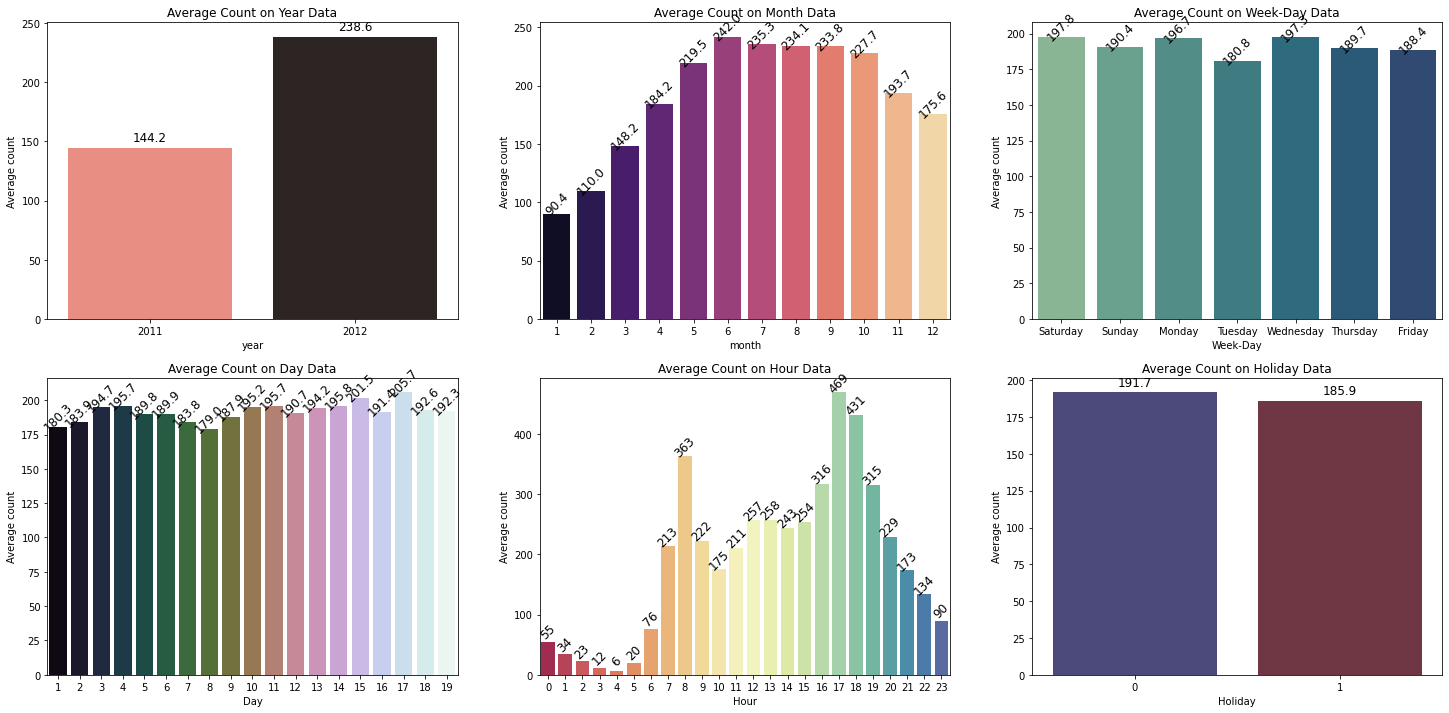

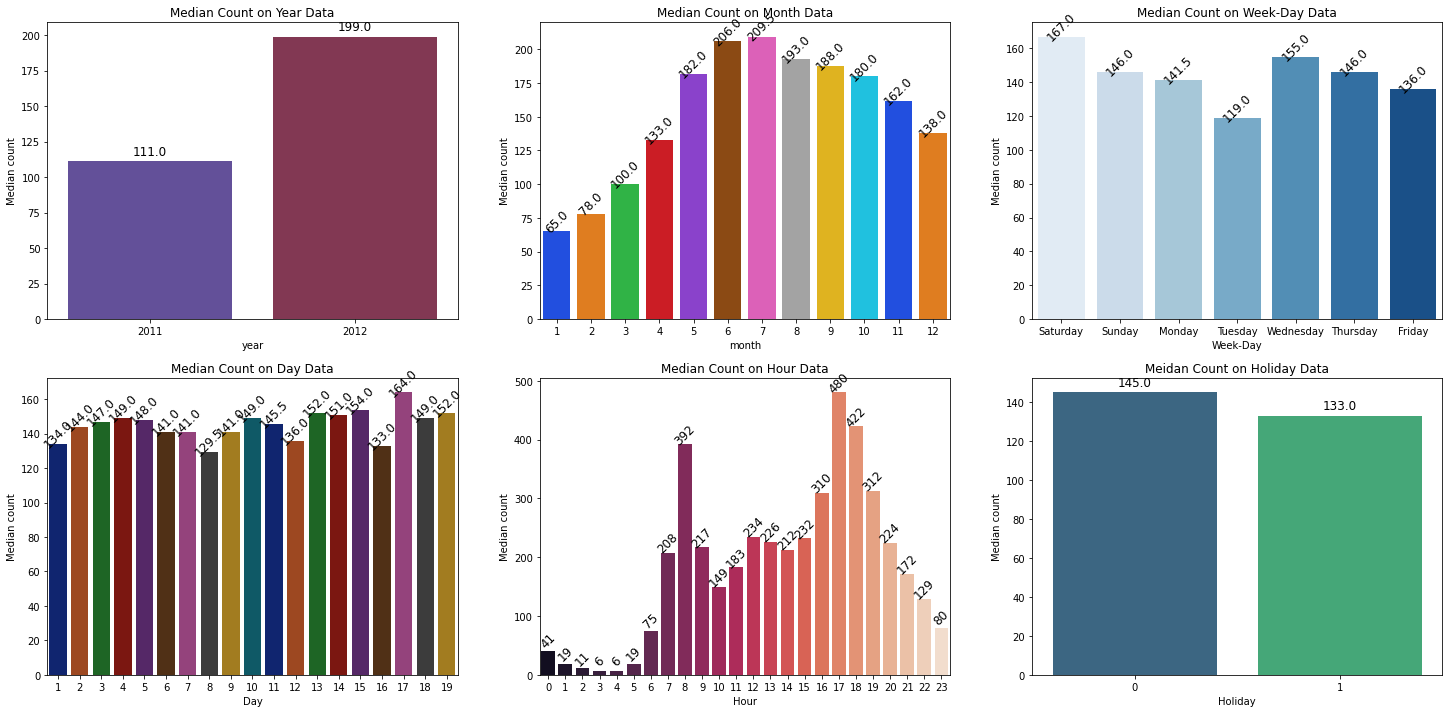

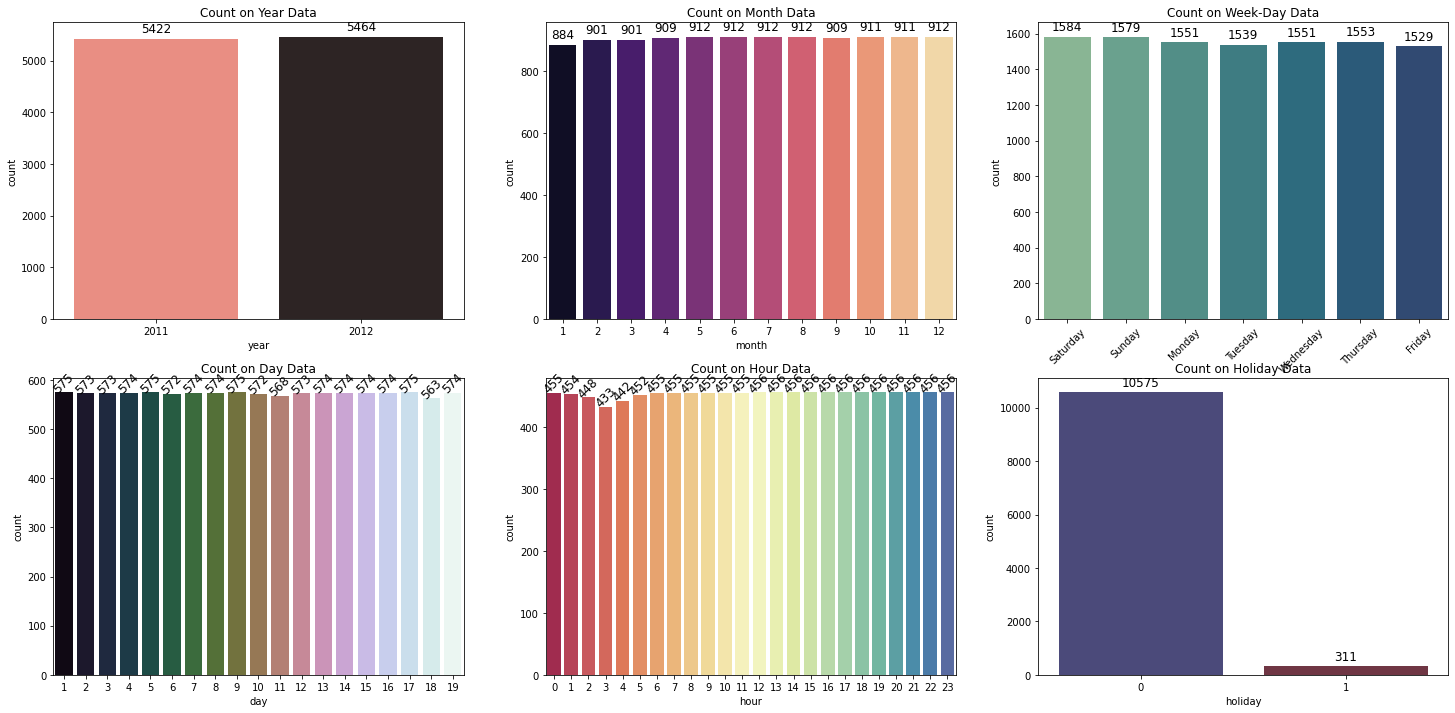

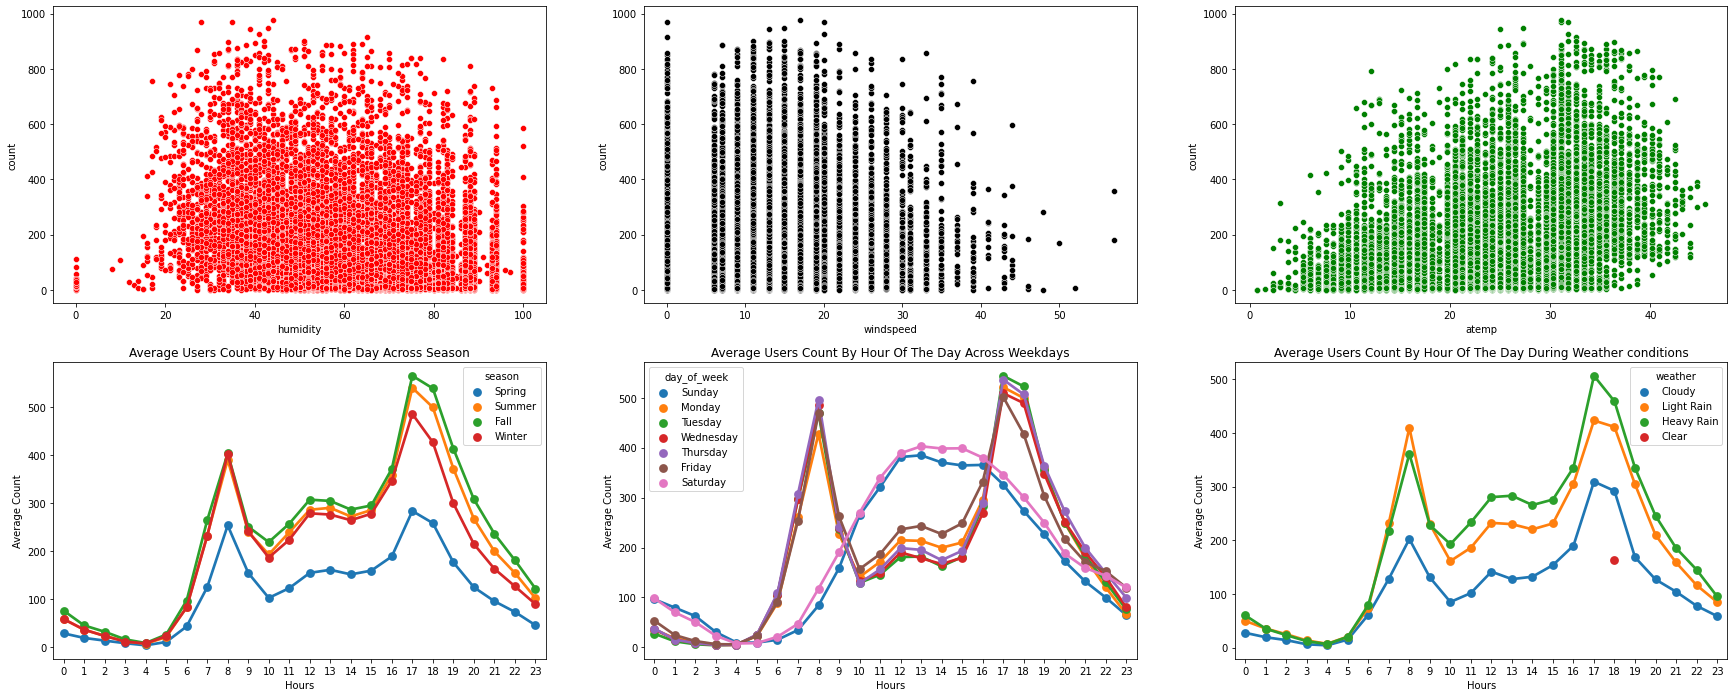

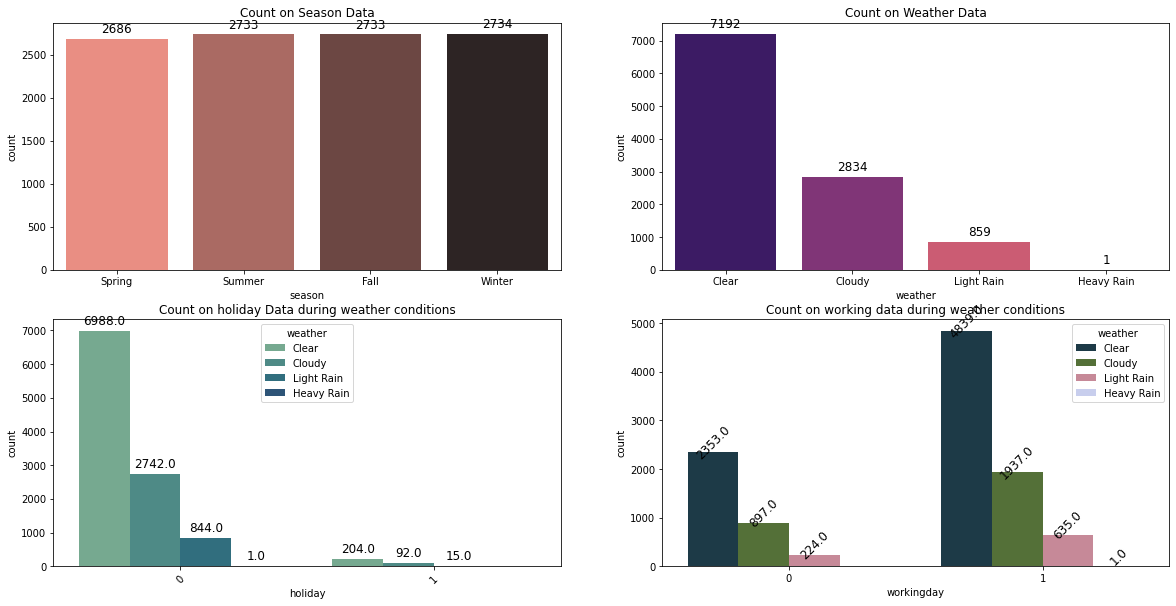

In [13]:
# Visualizing the features
visualize(df_train)

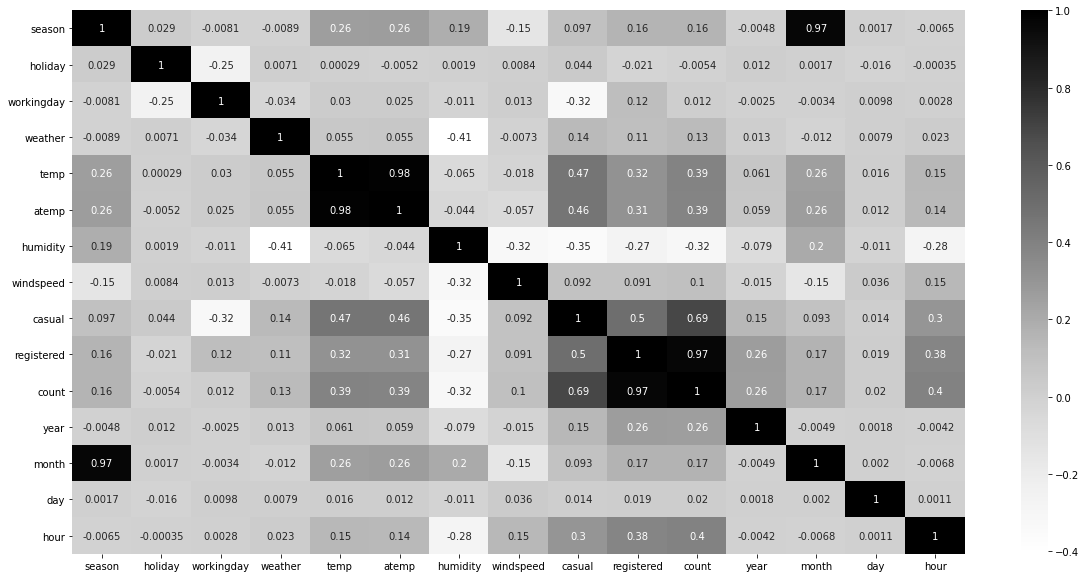

In [14]:
# correlation among the features in train data 
Correlation_Plot(df_train.corr()) 

In [17]:
# Getting the Response Variables
y = df_train['count']
y_test = df_test['count']

[13  5  2 ... 90 61 49]


In [18]:
# Display Count Variable for Train Data
y.head()

0    16
1    40
2    32
3    13
4    1 
Name: count, dtype: int64

In [19]:
# Display Count Variable for Test Data
y_test.head()

0    13
1    5 
2    2 
3    1 
4    1 
Name: count, dtype: int64

In [21]:
# dropping the features 
def drop_features(df,cols_list):
  """
  Function to drop the features in the list given and returns the modified dataframe 
  Args: df : dataframe (either train or test)
        cols_list: List of columns to be dropped from the dataframe
  Returns: Modified dataframe with given features dropped
  """
  df_modified=df.drop(cols_list,axis=1)
  print(df_modified.shape)
  return df_modified 

In [22]:
# Dropping Features from Train Data
drop_train_cols = ['datetime','temp','registered','casual','day','day_of_week','count','season']
df_train = drop_features(df_train,drop_train_cols)

# Dropping Features from Test Data
test_drop_cols = ['datetime','temp','day','day_of_week','count','season']
df_test = drop_features(df_test,test_drop_cols)

(10886, 9)
(6493, 9)


In [23]:
# Visualize Train Data after dropping features
df_train.head()

,holiday,workingday,weather,atemp,humidity,windspeed,year,month,hour
0,0,0,4,14.395,81,0.0,2011,1,0
1,0,0,4,13.635,80,0.0,2011,1,1
2,0,0,4,13.635,80,0.0,2011,1,2
3,0,0,4,14.395,75,0.0,2011,1,3
4,0,0,4,14.395,75,0.0,2011,1,4


In [24]:
# Visualize Test Data after dropping features
df_test.head()

,holiday,workingday,weather,atemp,humidity,windspeed,year,month,hour
0,0,1,4,11.365,56,26.0027,2011,1,0
1,0,1,4,13.635,56,0.0000,2011,1,1
2,0,1,4,13.635,56,0.0000,2011,1,2
3,0,1,4,12.880,56,11.0014,2011,1,3
4,0,1,4,12.880,56,11.0014,2011,1,4


In [25]:
# scaling the columns 
def max_norm(x):
  '''
  Function to Normalize using maximum value
  Args: x : list of values of the features
  Returns: Normalized list of values of the features 
  '''
  max_val = max(x)
  for i in range(len(x)):
    x[i]=(x[i])/(max_val)
  return x

def normalize_train_test(df):
  """
  Function to pass the list of columns for normalization for the given dataset
  Args: df : dataframe (either train or test)
  Returns: Modified dataframe with given normalized features values 
  """
  cols=df.columns.tolist()
  remove=['holiday','workingday']
  cols=[col for col in cols if col not in remove]
  for x in cols:
    df[x] = max_norm(list(df[x]))
  return df 

In [26]:
df_train = normalize_train_test(df_train)
df_test = normalize_train_test(df_test)

In [27]:
# Display Train Data after normalization
df_train.head()

,holiday,workingday,weather,atemp,humidity,windspeed,year,month,hour
0,0,0,1.0,0.316687,0.81,0.0,0.999503,0.083333,0.000000
1,0,0,1.0,0.299967,0.80,0.0,0.999503,0.083333,0.043478
2,0,0,1.0,0.299967,0.80,0.0,0.999503,0.083333,0.086957
3,0,0,1.0,0.316687,0.75,0.0,0.999503,0.083333,0.130435
4,0,0,1.0,0.316687,0.75,0.0,0.999503,0.083333,0.173913


In [28]:
# Display Test Data after normalization
df_test.head()

,holiday,workingday,weather,atemp,humidity,windspeed,year,month,hour
0,0,1,1.0,0.2273,0.56,0.464346,0.999503,0.083333,0.000000
1,0,1,1.0,0.2727,0.56,0.000000,0.999503,0.083333,0.043478
2,0,1,1.0,0.2727,0.56,0.000000,0.999503,0.083333,0.086957
3,0,1,1.0,0.2576,0.56,0.196458,0.999503,0.083333,0.130435
4,0,1,1.0,0.2576,0.56,0.196458,0.999503,0.083333,0.173913


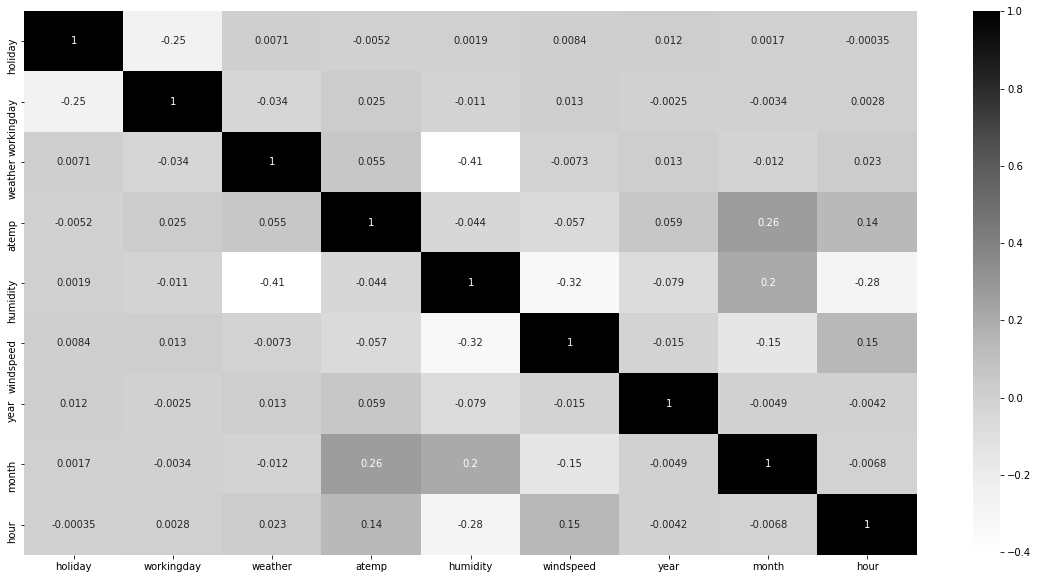

In [29]:
# Final Train Data Correlation Heatmap
Correlation_Plot(df_train.corr())

In [30]:
def train_validate_split(train_data):
  """
  Function splits the given data such that 80% as train and 20% as validation data
  Args: df : dataframe (input features data or output feature data)
  Returns: train and validation dataframe
  """
  train = train_data[:4*len(train_data)//5]      # 80% train data
  validate = train_data[(4*len(train_data)//5):] # 20% validate data 
  return train,validate

In [31]:
x_train,x_validate = train_validate_split(df_train)
x_test = df_test 
print("x_train shape :",x_train.shape)
print("x_validate shape :",x_validate.shape)
print("x_test shape",x_test.shape)

x_train shape : (8708, 9)
x_validate shape : (2178, 9)
x_test shape (6493, 9)


In [32]:
y_train, y_validate = train_validate_split(y)
print("y_train shape :",y_train.shape)
print("y_validate shape :",y_validate.shape)
print("y_test shape",y_test.shape)

y_train shape : (8708,)
y_validate shape : (2178,)
y_test shape (6493,)


In [37]:
# Storing Actual Counts in Numpy array
y_train_actual = np.array(y_train)
y_validate_actual = np.array(y_validate)
y_test_actual = np.array(y_test)

In [40]:
def arrayToDataFrame(data):
  """
  Function to convert the input data to dataframe
  Args: data : output data of type int
  Returns: output dataframe 
  """
  df=data.to_frame()
  df['count']=df['count'].astype('float')
  return df 

y_train = arrayToDataFrame(y_train)
y_validate = arrayToDataFrame(y_validate)
y_test = arrayToDataFrame(y_test)

In [41]:
# mean and standard deviation and maximum value of train output count (Response Variable)
mean_count=np.mean(y_train['count'])
sd_count=np.std(y_train['count'])
max_val_count = max(y_train['count'])
print("mean",mean_count)
print("standard deviation",sd_count)
print("Max_Count",max_val_count)

mean 174.39124942581535
standard deviation 166.42832805751206
Max_Count 891.0


In [42]:
# Normalizing Response Variables for Train, Validation and Test Data (Count)
y_train['count'] = max_norm(y_train['count'])
y_validate['count']=max_norm(list(y_validate['count']))
y_test['count']=max_norm(y_test['count'])

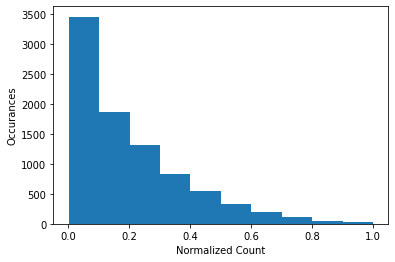

In [43]:
# Train Counts (Response variables) after normalizing 
plt.hist(y_train['count'])
plt.xlabel('Normalized Count')
plt.ylabel('Occurances')
plt.show()

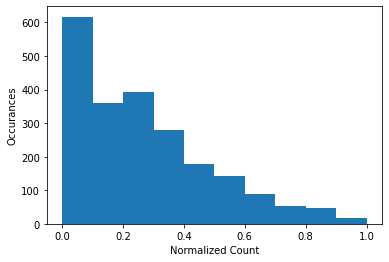

In [44]:
# Validation Counts (Response variables) after normalizing 
plt.hist(y_validate['count'])
plt.xlabel('Normalized Count')
plt.ylabel('Occurances')
plt.show()

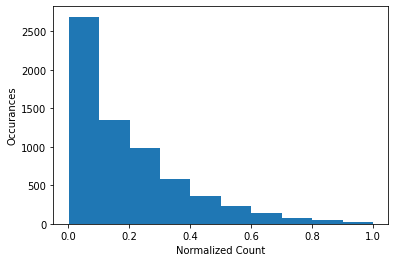

In [45]:
# Test Counts (Response variables) after normalizing 
plt.hist(y_test['count'])
plt.xlabel('Normalized Count')
plt.ylabel('Occurances')
plt.show()

In [46]:
# adding a constant column 
def Add_const_colum(df):
  """
  Function to add constant column of all values 1 to the dataframe 
  Args: data : dataframe
  Returns: dataframe with constant column added in beginning 
  """
  size=df.shape[0]
  const=[1]*size
  const_df=pd.DataFrame(const,columns=['Constant'],index=df.index)
  final_df=pd.concat([const_df,df],axis=1)
  return final_df

In [47]:
xn_train = Add_const_colum(x_train)
xn_validate=Add_const_colum(x_validate)
xn_test=Add_const_colum(x_test)

print('X_Train Shape = {}'.format(xn_train.shape))
print('X_Train Shape = {}'.format(xn_validate.shape))
print('X_Train Shape = {}'.format(xn_test.shape))

X_Train Shape = (8708, 10)
X_Train Shape = (2178, 10)
X_Train Shape = (6493, 10)


# Converting Final Dataframes to Numpy Array for Input in Regression Model

In [48]:
def dataFrameToArrays(df):
  """
  Function to convert the  dataframe to numpy arrays 
  Args: df : dataframe(either train or test or validate)
  Returns: arrays 
  """
  arr=df.to_numpy(dtype='float')
  print(arr.shape)
  return arr


# Poisson Regression Model

*   While Running any Training, First Run this cell





In [61]:
def init_weights(n,mode):
  """
  Function Initialize Weights 
  Args: n : dimension for Weights
        mode: 'Zero' = Zero Weights
              'Random' = Random Weights
  Returns: Initialized Weights Size = (dimension+1 x 1)
  """
  np.random.seed(42)
  if mode == 'Zero':
    w = np.zeros((n,1),dtype=float)
    return w
  elif mode == 'Random':
    w = np.random.rand(n,1) 
    return w

def y_pred(x,w):
  """
  Function for Poisson Regression Hypothesis h(x) = exp(w.T*x) 
  Args: x : Input Feature Matrix or Design Matrix
        w : Weights
  Returns: Prediction Y = h(x) = exp(w.T*x) with Size = (batch_size x 1)
  """
  pred = np.exp(np.dot(w.T,x.T))   # W = (n+1 x 1), X = (m x n+1),  W.T*X.T = (1 x m)
  return pred


def gradient_w(x,y,w,mode,reg = 0):
  """
  Function for gradient calculation for Poisson Regression 
  Args: x : Input Feature Matrix or Design Matrix
        y : Ture Response Variable
        w : Weights 
        mode: 'No' : No Regularization 
              'L1' : L1 Regularization 
              'L2' : L2 Regularization 
        reg:Regularization Hyper-parameter (set 0 if mode = 'No')
  Returns: Gradient of Loss with respect to W with Size = (n+1 x 1)
  """
  if (mode == 'No'):
    dw = np.dot((y_pred(x,w) - y.T),x)    # y_pred = (1 x m), y.T = (1 x m),  dw = (1 x n+1)
    return dw.T
  elif (mode == 'L1'):
    if np.sum(np.absolute(w))>0:
      dw = np.dot((y_pred(x,w) - y.T),x)+reg
    else:
      dw = np.dot((y_pred(x,w) - y.T),x)-reg 
    return dw.T
  elif (mode == 'L2'):
    dw = np.dot((y_pred(x,w) - y.T),x)+2*reg*w.T
    return dw.T

def loss(x,y_true,w,mode,reg = 0):
  """
  Function to compute loss (Negetive Log-likelihood) for Poisson Regression
  Args: x: Input Matrix or Design Matrix
        y_true: True Response Variable
        w: Weight
        mode: 'No' : No Regularization 
              'L1' : L1 Regularization 
              'L2' : L2 Regularization 
        reg:Regularization Hyper-parameter (set 0 if mode = 'No')
  Returns: Negetive Log Likelihood to Minimize
  """
  tot_loss = 0
  for i in range(y_true.shape[0]):
    xi = x[i]
    yi = y_true[i]
    loss = y_pred(xi,w) - np.dot(yi,np.dot(w.T,xi))
    tot_loss += loss
  final_loss_term = tot_loss/(y_true.shape[0])
  if (mode == 'No'):
    return final_loss_term
  elif (mode == 'L1'):
    final_loss = final_loss_term + reg * (np.sum(np.absolute(w)))
    return final_loss
  elif (mode == 'L2'):
    final_loss = final_loss_term + reg * (np.dot(w.T,w))
    return final_loss

def prediction_loss(y_pred,y_true):
  """
  Function to compute prediction loss (Negetive Log-likelihood) 
  Args: y_pred: Predicted Response Variable
        Y_true: True Response Variable
  Return: (Negetive Log-likelihood) Loss on Predicted Response Variable
  """
  tot_loss = 0
  for i in range(y_true.shape[0]):
    ypi = y_pred[i]
    yi = y_true[i]
    loss = ypi - np.dot(yi,np.log(ypi))
    tot_loss += loss
  final_loss = tot_loss/(y_true.shape[0])
  return final_loss[0]

def RMSLE(y_pred,y_true):
  """
  Function to compute RMSLE (Root Mean Squared Logarithmic Error)
  Args: y_pred: Predicted Response Variable
        Y_true: True Response Variable
  Return: RMSLE Loss on Predicted Response Variable
  """
  tot_loss = 0
  for i in range(y_true.shape[0]):
    ypi = y_pred[i]
    yi = y_true[i]
    loss = (np.log(ypi+1) - np.log(yi+1))**2
    tot_loss += loss
  final_loss = (tot_loss/(y_true.shape[0]))**(1/2)
  return final_loss[0]

def RMSE(y_pred,y_true):
  """
  Function to compute RMSE (Root Mean Squared Error)
  Args: y_pred: Predicted Response Variable
        Y_true: True Response Variable
  Return: RMSE Loss on Predicted Response Variable
  """
  tot_loss = 0
  for i in range(y_true.shape[0]):
    ypi = y_pred[i]
    yi = y_true[i]
    loss = (ypi - yi)**2
    tot_loss += loss
  final_loss = (tot_loss/(y_true.shape[0]))**(1/2)
  return final_loss[0]

def train(x_tr,y_tr,epochs,alpha,mode,weight_mode,reg = 0, verbose = True):
  """
  Function for training model
  Args: x_tr: Input Matrix or Design Matrix (Training Data)
        y_tr: True Response variable
        epochs: Number of Epochs for Training (Iteration for Gradient Descent)
        alpha: Learning Rate
        mode: 'No' : No Regularization 
              'L1' : L1 Regularization 
              'L2' : L2 Regularization
        weight_mode: 'Zero' : Zero Initialization of Weights
                     'Random' : Random Initialization of Weights
        reg: Regularization Hyper-parameter (set 0 if mode = 'No')
        verbose: 'True' for Printing Loss Value Per Epochs
                 'False' for suppressing Printing Loss Per Epoch 
  Returns: Trained Weights Size = (n+1 x 1)
  """
  print('Begining Training :: Mode = {}'.format(mode))
  w = init_weights(x_tr.shape[1],weight_mode)
  iteration = 0
  final_loss = 0
  plot=[]

  # Training
  for i in range(epochs):
    w = w - alpha * gradient_w(x_tr,y_tr,w,mode,reg)
    loss_val = loss(x_tr,y_tr,w,mode,reg)
    final_loss = loss_val[0]
    iteration += 1
    loss_val=loss_val.reshape(1,)
    plot.append(loss_val)
    if (verbose == True):
      print("Epoch : " + str(i) + " Loss :"+str(loss_val))
  print('End of Training :: Final Loss  = ' + str(final_loss))
 
  # Plotting Training Loss
  plt.plot(plot)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()

  return w

def predict(x,w):
  """
  Function to predict response variable 
  Args: x: Input Matrix
        w: Trained Weight 
  Returns:  Predicted Response Variable 
  """
  y_p = y_pred(x,w)
  return y_p.T

def predict_count(y_pred,max_count):
  '''
  Function to predict the complete count
  Args: y_pred: Predicted Normalized Response Values
        max_count: Maximum Count Encountered in Training Data
  Returns:  Predicted Response Variable in Proper Form
  '''
  pred_counts = []
  for i in range(y_pred.shape[0]):
    pred_counts.append(int(round(y_pred[i][0]*max_count)))
  pred_counts = np.reshape(np.array(pred_counts),(len(pred_counts),1))
  return pred_counts

# Hyper Parameter Tunning (No Regularization, L1 and L2 Regularization)

In [ ]:
# hyperparameter tuning 
def HyperParameterTuning(mode,x_tr,y_tr,x_val,y_val):
  """
  Function to return the dataframe with hyperparameters and corresponding train and validation loss for each hyperparameter value
  Args :x_tr: Input Matrix or Design Matrix (Training Data)
        y_tr: True Response variable
        x_val: Input Matrix or Design Matrix (Validation Data)
        y_val: True Response variable of validation data
        mode: 'No' : No Regularization
              'L1' : L1 Regularization 
              'L2' : L2 Regularization 
  Return : Dataframe containing the results of hyperparameter tuning 
  """
  epoch=700
  Learning_Rate=[0.0001,0.001,0.01]
  Reg_val=[0.0001,0.001,0.01,0.1]
  Weight_Mode=['Zero','Random']
  column_names=['Learning_Rate_alpha','Regularization Constant','Weight Initialization','Epochs','Train Loss','Test Loss','Final Weights']
  tuning_results_df=pd.DataFrame(columns=column_names)
  for weight_mode in Weight_Mode:
    w = init_weights(x_tr.shape[1],weight_mode)
    for alpha in Learning_Rate:
      for reg in Reg_val:
        iteration=1
        final_loss=0
        plot=[]
        my_dict_loss={}
        my_dict_weight={}
        for i in range(1,epoch+1):
          w = w - alpha * gradient_w(x_tr,y_tr,w,mode,reg)
          loss_val = loss(x_tr,y_tr,w,mode,reg)
          final_loss = loss_val[0]
          loss_val=loss_val.reshape(1,)
          plot.append(loss_val)
          my_dict_loss[iteration]=loss_val
          my_dict_weight[iteration]=w
          iteration+=1
        min_loss=min(plot)
        ind=list(my_dict_loss.keys())[list(my_dict_loss.values()).index(min_loss)]
        fw=my_dict_weight[ind]
        y_pred_val = predict(x_val,fw)
        y_val_counts = predict_count(y_pred_val,max_val_count)
        val_loss = prediction_loss(y_pred_val,y_val)
        tuning_results_df.loc[len(tuning_results_df.index)] = [alpha, reg, weight_mode,ind,min_loss[0],val_loss,fw]  
  return tuning_results_df

# 1. Tunning for L1 Regularization 

In [ ]:
# Converting Train Data to Numpy Array
x_train_pass=dataFrameToArrays(xn_train)
y_train_pass=dataFrameToArrays(y_train) 

# Converting Validation Data to Numpy Array
x_validate_pass=dataFrameToArrays(xn_validate)
y_validate_pass=dataFrameToArrays(y_validate)

# Converting Test Data to Numpy Array
x_test_pass=dataFrameToArrays(xn_test) 
y_test_pass=dataFrameToArrays(y_test)  

# Takes Time to run due to several combination of Hyper-Parameters
L1_hyper_tuning_result=HyperParameterTuning('L1',x_train_pass,y_train_pass,xn_validate,y_validate_pass)

(8708, 10)
(8708, 1)
(2178, 10)
(2178, 1)
(6493, 10)
(6493, 1)


In [ ]:
# (Only For Google Colab)

# Saving L1 regularization dataframe results
L1_hyper_tuning_result.to_excel("L1_hyperparameter.xlsx") 
from google.colab import files
files.download('L1_hyperparameter.xlsx')
# Reading the L1_regularization results
L1_hyper_tuning_result=pd.read_excel('/content/gdrive/My Drive/L1_hyperparameter.xlsx')
L1_hyper_tuning_result['Final Weights'] = L1_hyper_tuning_result['Final Weights'].str.replace('\n',',')

# 2. Tunning for L2 Regularization

In [ ]:
# Converting Train Data to Numpy Array
x_train_pass=dataFrameToArrays(xn_train)
y_train_pass=dataFrameToArrays(y_train) 

# Converting Validation Data to Numpy Array
x_validate_pass=dataFrameToArrays(xn_validate)
y_validate_pass=dataFrameToArrays(y_validate)

# Converting Test Data to Numpy Array
x_test_pass=dataFrameToArrays(xn_test) 
y_test_pass=dataFrameToArrays(y_test)  

# Takes Time to run due to several combination of Hyper-Parameters
L2_hyper_tuning_result=HyperParameterTuning('L2',x_train_pass,y_train_pass,xn_validate,y_validate_pass)

(8708, 10)
(8708, 1)
(2178, 10)
(2178, 1)
(6493, 10)
(6493, 1)


In [ ]:
# (Only For Google Colab)
# Saving L2 regularization dataframe results
L2_hyper_tuning_result.to_excel("L2_hyperparameter.xlsx") 
from google.colab import files
files.download('L2_hyperparameter.xlsx')
# Reading the L2_regularization results
L2_hyper_tuning_result=pd.read_excel('/content/gdrive/My Drive/L2_hyperparameter.xlsx')
L2_hyper_tuning_result['Final Weights'] = L2_hyper_tuning_result['Final Weights'].str.replace('\n',',')

#  Best Hyper-Parameter Summary

 1. **No Regularization :**
        Learning rate (alpha) = 0.0001
                       epochs = 200
                  weight mode = 'Zero'

2.  **L1 Regularization :**
        
        Regularization Constant = 0.0001
          Learning rate (alpha) = 0.0001
                         epochs = 700
                    weight mode = 'Random'

3.  **L2 Regularization :**
        
        Regularization Constant = 0.0001
          Learning rate (alpha) = 0.0001
                         epochs = 700
                    weight mode = 'Random'

# Training and Testing with Best Hyper-parameters


*   Run The Cell of Poisson Regression Model before begining any Training (No,L1,L2)



# 1. Training and Testing for No Regularization

(8708, 10)
(8708, 1)
(2178, 10)
(2178, 1)
(6493, 10)
(6493, 1)
Begining Training :: Mode = No
Epoch : 0 Loss :[0.66524653]
Epoch : 1 Loss :[0.58264633]
Epoch : 2 Loss :[0.53841486]
Epoch : 3 Loss :[0.52355181]
Epoch : 4 Loss :[0.52033336]
Epoch : 5 Loss :[0.51926532]
Epoch : 6 Loss :[0.51841921]
Epoch : 7 Loss :[0.51760938]
Epoch : 8 Loss :[0.51682318]
Epoch : 9 Loss :[0.51605916]
Epoch : 10 Loss :[0.51531654]
Epoch : 11 Loss :[0.51459458]
Epoch : 12 Loss :[0.51389261]
Epoch : 13 Loss :[0.51320996]
Epoch : 14 Loss :[0.51254599]
Epoch : 15 Loss :[0.5119001]
Epoch : 16 Loss :[0.5112717]
Epoch : 17 Loss :[0.51066021]
Epoch : 18 Loss :[0.51006511]
Epoch : 19 Loss :[0.50948586]
Epoch : 20 Loss :[0.50892196]
Epoch : 21 Loss :[0.50837294]
Epoch : 22 Loss :[0.50783831]
Epoch : 23 Loss :[0.50731764]
Epoch : 24 Loss :[0.50681048]
Epoch : 25 Loss :[0.50631643]
Epoch : 26 Loss :[0.50583509]
Epoch : 27 Loss :[0.50536605]
Epoch : 28 Loss :[0.50490896]
Epoch : 29 Loss :[0.50446344]
Epoch : 30 Loss :[

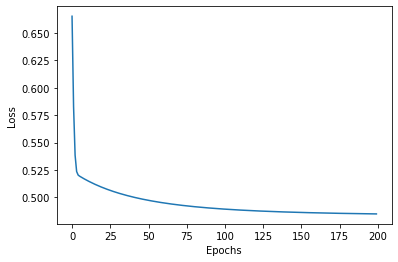

In [50]:
# Converting Train Data to Numpy Array
x_train_pass=dataFrameToArrays(xn_train)
y_train_pass=dataFrameToArrays(y_train) 

# Converting Validation Data to Numpy Array
x_validate_pass=dataFrameToArrays(xn_validate)
y_validate_pass=dataFrameToArrays(y_validate)

# Converting Test Data to Numpy Array
x_test_pass=dataFrameToArrays(xn_test) 
y_test_pass=dataFrameToArrays(y_test)  

# Hyper Parameters
Epoch = 200
Learning_Rate = 0.0001 
Reg_val = 0
Weight_Mode = 'Zero' 
Mode = 'No'

# Model Training
w_final_No = train(x_train_pass,y_train_pass, Epoch, Learning_Rate, Mode, Weight_Mode, Reg_val,verbose = True)

In [51]:
# No Regularization Weights
print('Final Weights = \n{}'.format(w_final_No))

Final Weights = 
[[-0.93017646]
 [-0.07213656]
 [-0.04212635]
 [-0.29637905]
 [ 1.12284604]
 [-1.25096074]
 [-0.03482897]
 [-0.92825522]
 [ 0.25428292]
 [ 0.95601876]]


In [54]:
# Validation Loss
y_pred_val = predict(xn_validate,w_final_No)
y_val_counts = predict_count(y_pred_val,max_val_count)

val_loss_norm = prediction_loss(y_pred_val,y_validate_pass)
val_rmsle_norm = RMSLE(y_pred_val,y_validate_pass)
val_rmse_norm = RMSE(y_pred_val,y_validate_pass)

val_loss = prediction_loss(y_val_counts,y_validate_actual)
val_rmsle = RMSLE(y_val_counts,y_validate_actual)
val_rmse = RMSE(y_val_counts,y_validate_actual)


# Printing First 5 Predictions on Validation Data and Validation Loss
print('Validation Predictions = \n{}'.format(y_pred_val[0:5]))
print('Validation Actual Counts = \n{}'.format(y_validate_actual[0:5]))
print('Validation Predicted Counts = \n{}'.format(y_val_counts[0:5]))

print('Normalized Validation Loss (Negetive Log Likelihood): {}'.format(val_loss_norm))
print('Normalized Validation RMSLE: {}'.format(val_rmsle_norm))
print('Normalized Validation RMSE: {}'.format(val_rmse_norm))

print('Validation Loss (Negetive Log Likelihood): {}'.format(val_loss))
print('Validation RMSLE: {}'.format(val_rmsle))
print('Validation RMSE: {}'.format(val_rmse))

Validation Predictions = 
[[0.15681649]
 [0.15356045]
 [0.17330005]
 [0.20320534]
 [0.24425301]]
Validation Actual Counts = 
[ 19  19  68 108 229]
Validation Predicted Counts = 
[[140]
 [137]
 [154]
 [181]
 [218]]
Normalized Validation Loss (Negetive Log Likelihood): 0.5957922304331279
Normalized Validation RMSLE: 0.14330119704781596
Normalized Validation RMSE: 0.19801361818221078
Validation Loss (Negetive Log Likelihood): -1203.2911078253414
Validation RMSLE: 1.1182540800404737
Validation RMSE: 201.27887492550332


In [55]:
# Test Loss
y_pred = predict(xn_test,w_final_No)
y_counts = predict_count(y_pred,max_val_count)

test_loss_norm = prediction_loss(y_pred,y_test_pass)
test_rmsle_norm = RMSLE(y_pred,y_test_pass)
test_rmse_norm = RMSE(y_pred,y_test_pass)

test_loss = prediction_loss(y_counts,y_test_actual)
test_rmsle = RMSLE(y_counts,y_test_actual)
test_rmse = RMSE(y_counts,y_test_actual)

# Printing First 10 Predictions on Validation Data and Complete Validation Loss
print('Test Predictions = \n{}'.format(y_pred[0:5]))
print('Test Actual Counts Normalized = \n{}'.format(y_test_actual[0:5]))
print('Test Predicted Counts = \n{}'.format(y_counts[0:5]))

print('Normalized Test Loss (Negetive Log Likelihood): {}'.format(test_loss_norm))
print('Normalized Test RMSLE: {}'.format(test_rmsle_norm))
print('Normalized Test RMSE: {}'.format(test_rmse_norm))

print('Test Loss (Negetive Log Likelihood): {}'.format(test_loss))
print('Test RMSLE: {}'.format(test_rmsle))
print('Test RMSE: {}'.format(test_rmse))

Test Predictions = 
[[0.07159191]
 [0.07981392]
 [0.08320138]
 [0.08469297]
 [0.08828751]]
Test Actual Counts Normalized = 
[13  5  2  1  1]
Test Predicted Counts = 
[[64]
 [71]
 [74]
 [75]
 [79]]
Normalized Test Loss (Negetive Log Likelihood): 0.47813982403915817
Normalized Test RMSLE: 0.11917806346078913
Normalized Test RMSE: 0.15649407346993088
Test Loss (Negetive Log Likelihood): -811.8510212109068
Test RMSLE: 1.2377699395516386
Test RMSE: 155.0540602157969


# 2. Training and Testing for L1 Regularization

(8708, 10)
(8708, 1)
(2178, 10)
(2178, 1)
(6493, 10)
(6493, 1)
Begining Training :: Mode = L1
Epoch : 0 Loss :[19.32029363]
Epoch : 1 Loss :[19.16472117]
Epoch : 2 Loss :[19.00914871]
Epoch : 3 Loss :[18.85357625]
Epoch : 4 Loss :[18.69800379]
Epoch : 5 Loss :[18.54243133]
Epoch : 6 Loss :[18.38685887]
Epoch : 7 Loss :[18.23128641]
Epoch : 8 Loss :[18.07571395]
Epoch : 9 Loss :[17.92014149]
Epoch : 10 Loss :[17.76456903]
Epoch : 11 Loss :[17.60899657]
Epoch : 12 Loss :[17.45342411]
Epoch : 13 Loss :[17.29785164]
Epoch : 14 Loss :[17.14227918]
Epoch : 15 Loss :[16.98670672]
Epoch : 16 Loss :[16.83113426]
Epoch : 17 Loss :[16.6755618]
Epoch : 18 Loss :[16.51998934]
Epoch : 19 Loss :[16.36441688]
Epoch : 20 Loss :[16.20884442]
Epoch : 21 Loss :[16.05327196]
Epoch : 22 Loss :[15.8976995]
Epoch : 23 Loss :[15.74212704]
Epoch : 24 Loss :[15.58655458]
Epoch : 25 Loss :[15.43098212]
Epoch : 26 Loss :[15.27540966]
Epoch : 27 Loss :[15.1198372]
Epoch : 28 Loss :[14.96426474]
Epoch : 29 Loss :[14

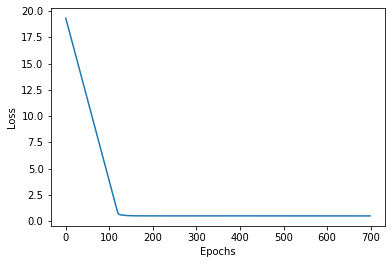

In [57]:
# Converting Train Data to Numpy Array
x_train_pass=dataFrameToArrays(xn_train)
y_train_pass=dataFrameToArrays(y_train) 

# Converting Validation Data to Numpy Array
x_validate_pass=dataFrameToArrays(xn_validate)
y_validate_pass=dataFrameToArrays(y_validate)

# Converting Test Data to Numpy Array
x_test_pass=dataFrameToArrays(xn_test) 
y_test_pass=dataFrameToArrays(y_test)  
# Hyper Parameters
Epoch = 700
Learning_Rate = 0.0001 
Reg_val = 0.0001
Weight_Mode = 'Random' 
Mode = 'L1'

# Model Training
w_final_L1 = train(x_train_pass,y_train_pass, Epoch, Learning_Rate, Mode, Weight_Mode, Reg_val,verbose = True)

In [58]:
# L1 Regularization Weights
print('Final Weights = \n{}'.format(w_final_L1))

Final Weights = 
[[-1.38804603]
 [-0.04569529]
 [-0.02628045]
 [-0.18093482]
 [ 1.66655118]
 [-1.31649405]
 [-0.00423667]
 [-0.8903253 ]
 [ 0.21348896]
 [ 1.00542172]]


In [59]:
# Validation Loss
y_pred_val = predict(xn_validate,w_final_L1)
y_val_counts = predict_count(y_pred_val,max_val_count)

val_loss_norm = prediction_loss(y_pred_val,y_validate_pass)
val_rmsle_norm = RMSLE(y_pred_val,y_validate_pass)
val_rmse_norm = RMSE(y_pred_val,y_validate_pass)

val_loss = prediction_loss(y_val_counts,y_validate_actual)
val_rmsle = RMSLE(y_val_counts,y_validate_actual)
val_rmse = RMSE(y_val_counts,y_validate_actual)


# Printing First 5 Predictions on Validation Data and Validation Loss
print('Validation Predictions = \n{}'.format(y_pred_val[0:5]))
print('Validation Actual Counts = \n{}'.format(y_validate_actual[0:5]))
print('Validation Predicted Counts = \n{}'.format(y_val_counts[0:5]))

print('Normalized Validation Loss (Negetive Log Likelihood): {}'.format(val_loss_norm))
print('Normalized Validation RMSLE: {}'.format(val_rmsle_norm))
print('Normalized Validation RMSE: {}'.format(val_rmse_norm))

print('Validation Loss (Negetive Log Likelihood): {}'.format(val_loss))
print('Validation RMSLE: {}'.format(val_rmsle))
print('Validation RMSE: {}'.format(val_rmse))

Validation Predictions = 
[[0.16593696]
 [0.16230824]
 [0.18613905]
 [0.22212561]
 [0.27649422]]
Validation Actual Counts = 
[ 19  19  68 108 229]
Validation Predicted Counts = 
[[148]
 [145]
 [166]
 [198]
 [246]]
Normalized Validation Loss (Negetive Log Likelihood): 0.597627025272132
Normalized Validation RMSLE: 0.1438378099464423
Normalized Validation RMSE: 0.1981856662106071
Validation Loss (Negetive Log Likelihood): -1200.9692493711168
Validation RMSLE: 1.0958457240035784
Validation RMSE: 201.45542063041495


In [60]:
# Test Loss
y_pred = predict(xn_test,w_final_No)
y_counts = predict_count(y_pred,max_val_count)

test_loss_norm = prediction_loss(y_pred,y_test_pass)
test_rmsle_norm = RMSLE(y_pred,y_test_pass)
test_rmse_norm = RMSE(y_pred,y_test_pass)

test_loss = prediction_loss(y_counts,y_test_actual)
test_rmsle = RMSLE(y_counts,y_test_actual)
test_rmse = RMSE(y_counts,y_test_actual)

# Printing First 10 Predictions on Validation Data and Complete Validation Loss
print('Test Predictions = \n{}'.format(y_pred[0:5]))
print('Test Actual Counts Normalized = \n{}'.format(y_test_actual[0:5]))
print('Test Predicted Counts = \n{}'.format(y_counts[0:5]))

print('Normalized Test Loss (Negetive Log Likelihood): {}'.format(test_loss_norm))
print('Normalized Test RMSLE: {}'.format(test_rmsle_norm))
print('Normalized Test RMSE: {}'.format(test_rmse_norm))

print('Test Loss (Negetive Log Likelihood): {}'.format(test_loss))
print('Test RMSLE: {}'.format(test_rmsle))
print('Test RMSE: {}'.format(test_rmse))

Test Predictions = 
[[0.07159191]
 [0.07981392]
 [0.08320138]
 [0.08469297]
 [0.08828751]]
Test Actual Counts Normalized = 
[13  5  2  1  1]
Test Predicted Counts = 
[[64]
 [71]
 [74]
 [75]
 [79]]
Normalized Test Loss (Negetive Log Likelihood): 0.47813982403915817
Normalized Test RMSLE: 0.11917806346078913
Normalized Test RMSE: 0.15649407346993088
Test Loss (Negetive Log Likelihood): -811.8510212109068
Test RMSLE: 1.2377699395516386
Test RMSE: 155.0540602157969


# 3. Training and Testing for L2 Regularization

(8708, 10)
(8708, 1)
(2178, 10)
(2178, 1)
(6493, 10)
(6493, 1)
Begining Training :: Mode = L2
Epoch : 0 Loss :[19.51716247]
Epoch : 1 Loss :[19.35834424]
Epoch : 2 Loss :[19.19955308]
Epoch : 3 Loss :[19.040789]
Epoch : 4 Loss :[18.88205201]
Epoch : 5 Loss :[18.72334209]
Epoch : 6 Loss :[18.56465926]
Epoch : 7 Loss :[18.4060035]
Epoch : 8 Loss :[18.24737482]
Epoch : 9 Loss :[18.08877323]
Epoch : 10 Loss :[17.93019871]
Epoch : 11 Loss :[17.77165127]
Epoch : 12 Loss :[17.61313091]
Epoch : 13 Loss :[17.45463763]
Epoch : 14 Loss :[17.29617144]
Epoch : 15 Loss :[17.13773232]
Epoch : 16 Loss :[16.97932028]
Epoch : 17 Loss :[16.82093532]
Epoch : 18 Loss :[16.66257744]
Epoch : 19 Loss :[16.50424664]
Epoch : 20 Loss :[16.34594292]
Epoch : 21 Loss :[16.18766628]
Epoch : 22 Loss :[16.02941672]
Epoch : 23 Loss :[15.87119424]
Epoch : 24 Loss :[15.71299884]
Epoch : 25 Loss :[15.55483052]
Epoch : 26 Loss :[15.39668928]
Epoch : 27 Loss :[15.23857511]
Epoch : 28 Loss :[15.08048803]
Epoch : 29 Loss :[14

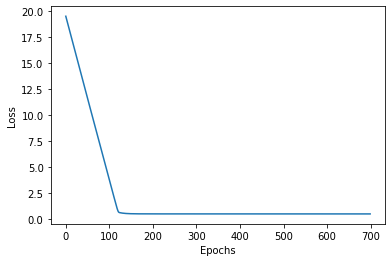

In [62]:
# Converting Train Data to Numpy Array
x_train_pass=dataFrameToArrays(xn_train)
y_train_pass=dataFrameToArrays(y_train) 

# Converting Validation Data to Numpy Array
x_validate_pass=dataFrameToArrays(xn_validate)
y_validate_pass=dataFrameToArrays(y_validate)

# Converting Test Data to Numpy Array
x_test_pass=dataFrameToArrays(xn_test) 
y_test_pass=dataFrameToArrays(y_test)  

# Hyper Parameters
Epoch = 700
Learning_Rate = 0.0001 
Reg_val = 0.0001
Weight_Mode = 'Random' 
Mode = 'L2'

# Model Training
w_final_L2 = train(x_train_pass,y_train_pass,Epoch,Learning_Rate,Mode,Weight_Mode,Reg_val,verbose = True)

In [63]:
# L2 Regularization Weights
print('Final Weights = \n{}'.format(w_final_L2))

Final Weights = 
[[-1.38804145]
 [-0.04569339]
 [-0.02628049]
 [-0.18093505]
 [ 1.66654571]
 [-1.3164909 ]
 [-0.00423457]
 [-0.89032765]
 [ 0.21348904]
 [ 1.00542026]]


In [64]:
# Validation Loss
y_pred_val = predict(xn_validate,w_final_L2)
y_val_counts = predict_count(y_pred_val,max_val_count)

val_loss_norm = prediction_loss(y_pred_val,y_validate_pass)
val_rmsle_norm = RMSLE(y_pred_val,y_validate_pass)
val_rmse_norm = RMSE(y_pred_val,y_validate_pass)

val_loss = prediction_loss(y_val_counts,y_validate_actual)
val_rmsle = RMSLE(y_val_counts,y_validate_actual)
val_rmse = RMSE(y_val_counts,y_validate_actual)


# Printing First 5 Predictions on Validation Data and Validation Loss
print('Validation Predictions = \n{}'.format(y_pred_val[0:5]))
print('Validation Actual Counts = \n{}'.format(y_validate_actual[0:5]))
print('Validation Predicted Counts = \n{}'.format(y_val_counts[0:5]))

print('Normalized Validation Loss (Negetive Log Likelihood): {}'.format(val_loss_norm))
print('Normalized Validation RMSLE: {}'.format(val_rmsle_norm))
print('Normalized Validation RMSE: {}'.format(val_rmse_norm))

print('Validation Loss (Negetive Log Likelihood): {}'.format(val_loss))
print('Validation RMSLE: {}'.format(val_rmsle))
print('Validation RMSE: {}'.format(val_rmse))

Validation Predictions = 
[[0.16593705]
 [0.16230834]
 [0.18613912]
 [0.22212562]
 [0.27649411]]
Validation Actual Counts = 
[ 19  19  68 108 229]
Validation Predicted Counts = 
[[148]
 [145]
 [166]
 [198]
 [246]]
Normalized Validation Loss (Negetive Log Likelihood): 0.5976269853803605
Normalized Validation RMSLE: 0.14383779072557318
Normalized Validation RMSE: 0.19818564965812274
Validation Loss (Negetive Log Likelihood): -1200.9692493711168
Validation RMSLE: 1.0958457240035784
Validation RMSE: 201.45542063041495


In [65]:
# Test Loss
y_pred = predict(xn_test,w_final_L2)
y_counts = predict_count(y_pred,max_val_count)

test_loss_norm = prediction_loss(y_pred,y_test_pass)
test_rmsle_norm = RMSLE(y_pred,y_test_pass)
test_rmse_norm = RMSE(y_pred,y_test_pass)

test_loss = prediction_loss(y_counts,y_test_actual)
test_rmsle = RMSLE(y_counts,y_test_actual)
test_rmse = RMSE(y_counts,y_test_actual)

# Printing First 10 Predictions on Validation Data and Complete Validation Loss
print('Test Predictions = \n{}'.format(y_pred[0:5]))
print('Test Actual Counts Normalized = \n{}'.format(y_test_actual[0:5]))
print('Test Predicted Counts = \n{}'.format(y_counts[0:5]))

print('Normalized Test Loss (Negetive Log Likelihood): {}'.format(test_loss_norm))
print('Normalized Test RMSLE: {}'.format(test_rmsle_norm))
print('Normalized Test RMSE: {}'.format(test_rmse_norm))

print('Test Loss (Negetive Log Likelihood): {}'.format(test_loss))
print('Test RMSLE: {}'.format(test_rmsle))
print('Test RMSE: {}'.format(test_rmse))

Test Predictions = 
[[0.05914597]
 [0.06677641]
 [0.06976022]
 [0.07100718]
 [0.07418003]]
Test Actual Counts Normalized = 
[13  5  2  1  1]
Test Predicted Counts = 
[[53]
 [59]
 [62]
 [63]
 [66]]
Normalized Test Loss (Negetive Log Likelihood): 0.47631567251956164
Normalized Test RMSLE: 0.1175134444630283
Normalized Test RMSE: 0.155100647301226
Test Loss (Negetive Log Likelihood): -813.0638276447559
Test RMSLE: 1.1816356994898034
Test RMSE: 153.83784749046313


**Test Loss Summary (For Best Hyper Parameters) :**

1. **No Regularization:**
         Normalized Test Loss (Negetive Log Likelihood) = 0.47813982403915817
         Normalized Test Loss (RMSLE)                   = 0.11917806346078913
         Normalized Test Loss (RMSE)                    = 0.15649407346993088

         Test Loss (RMSLE)                              = 1.2377699395516386
         Test Loss (RMSE)                               = 155.0540602157969
2. **L1 Regularization:**
         Normalized Test Loss (Negetive Log Likelihood) = 0.47631566753003873
         Normalized Test Loss (RMSLE)                   = 0.11751344521906962
         Normalized Test Loss (RMSE)                    = 0.15510065671715165

         Test Loss (RMSLE)                              = 1.2377699395516386
         Test Loss (RMSE)                               = 155.0540602157969
3. **L2 Regularization:**
         Normalized Test Loss (Negetive Log Likelihood) = 0.4763156725221943
         Normalized Test Loss (RMSLE)                   = 0.1175134444630283
         Normalized Test Loss (RMSE)                    = 0.155100647301226

         Test Loss (RMSLE)                              = 1.1816356994898034
         Test Loss (RMSE)                               = 153.83784749046313

# Determining Important Features  

In [66]:
def feature_importance(mode,w):
  """
  Function to display the important features 
  Args : mode : 'No' : No Regularization 
                'L1' : L1 Regularization 
                'L2' : L2 Regularization 
            w :  weights of the mode mentioned 
  """
  w=np.absolute(w)
  fig, ax = plt.subplots(figsize=(10, 6))
  col_list=['Constant','holiday','workingday','weather','atemp','humidity','windspeed','year','month','hour']
  w_final=[]
  print(mode)
  for i,v in enumerate(w):
    print("Feature : "+col_list[i]+" "+' Score: %.11f' % (v))
    w_final.append(v[0])
    
# plot feature importance
  plt.bar([x for x in range(len(w_final))], w_final)
  plt.xticks(range(len(w_final)),xn_train.columns)
  plt.setp(ax.get_xticklabels(), rotation = 0)
  plt.xlabel("Features")
  plt.ylabel("Absolute value of weights for feature")
  plt.show()

NO REGULARIZATION
Feature : Constant  Score: 0.93017645890
Feature : holiday  Score: 0.07213655746
Feature : workingday  Score: 0.04212634894
Feature : weather  Score: 0.29637904911
Feature : atemp  Score: 1.12284604262
Feature : humidity  Score: 1.25096074309
Feature : windspeed  Score: 0.03482896910
Feature : year  Score: 0.92825521948
Feature : month  Score: 0.25428291788
Feature : hour  Score: 0.95601875898


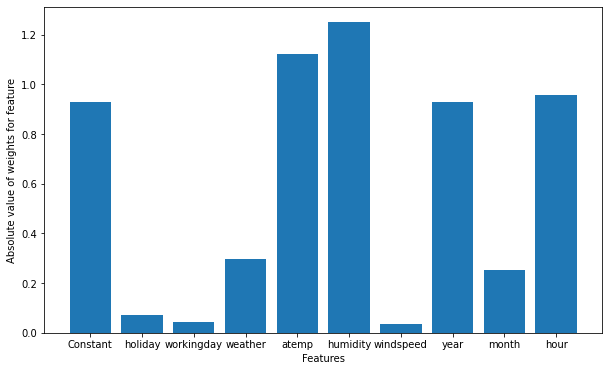

In [67]:
# No regularization 
feature_importance("NO REGULARIZATION",w_final_No)

L1 REGULARIZATION
Feature : Constant  Score: 1.38804602776
Feature : holiday  Score: 0.04569529087
Feature : workingday  Score: 0.02628045472
Feature : weather  Score: 0.18093482404
Feature : atemp  Score: 1.66655117943
Feature : humidity  Score: 1.31649404880
Feature : windspeed  Score: 0.00423667209
Feature : year  Score: 0.89032530410
Feature : month  Score: 0.21348896376
Feature : hour  Score: 1.00542172433


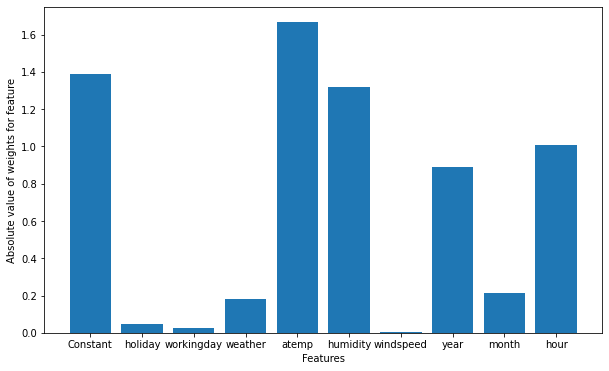

In [68]:
# L1 regularization 
feature_importance("L1 REGULARIZATION",w_final_L1)

L2 REGULARIZATION
Feature : Constant  Score: 1.38804145350
Feature : holiday  Score: 0.04569338857
Feature : workingday  Score: 0.02628048646
Feature : weather  Score: 0.18093504692
Feature : atemp  Score: 1.66654570890
Feature : humidity  Score: 1.31649089950
Feature : windspeed  Score: 0.00423456778
Feature : year  Score: 0.89032765124
Feature : month  Score: 0.21348903600
Feature : hour  Score: 1.00542026089


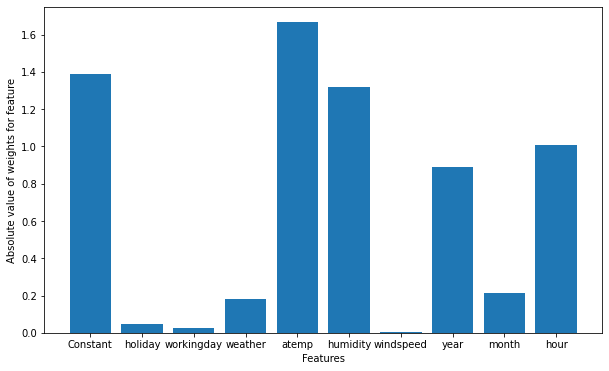

In [69]:
# L2 regularization 
feature_importance("L2 REGULARIZATION",w_final_L2)

**Important Features :**
  
1. atemp 
2. humidity 
3. hour 
4. year


In [ ]:
%%shell
jupyter nbconvert --to html /content/ML_Assignment_1_Q4.ipynb

[NbConvertApp] Converting notebook /content/ML_Assignment_1_Q4.ipynb to html
[NbConvertApp] Writing 1788655 bytes to /content/ML_Assignment_1_Q4.html
